In [2]:
!pip install pyramid
!pip install pyramid-arima
!pip install pmdarima
!pip install plotly
!pip install cufflinks

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.7 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-8hy_2jir/pyramid-arima/setup.py'"'"'; __file__='"'"'/tmp/pip-install-8hy_2jir/pyramid-arima/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-x8ew6va3
       cwd: /tmp/pip-install-8hy_2jir/pyramid-arima/
  Complete output (516 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cython>=0.23', 'numpy>=1.10', 'scipy>=0.9', 'scikit-learn>=0.17', 'pandas>=0.19', 'statsmodels>=0.9.0']
  Adding extra setuptools args
  blas_opt_info:
  blas_mkl_info:
  customize UnixCCompiler
    libraries mkl_rt not found in ['/opt/conda/lib', '/usr/local/lib', '/usr/lib', '/usr/lib/x86_64-linux-gnu']
    NOT AVAILABLE

In [59]:
import pandas as pd #read csv
import numpy #Linear algebra
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time #helper libraries
import datetime
from datetime import datetime, timedelta
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

from pylab import rcParams

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.graphics.tsaplots as sgt

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.arima.model as stats

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
#from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pandas import Series

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from matplotlib import pyplot
from matplotlib.pylab import rcParams

import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error


In [60]:
df = pd.read_csv('https://data.usaid.gov/api/views/a3rc-nmf6/rows.csv?accessType=DOWNLOAD',index_col='scheduled delivery date',parse_dates=True)

In [61]:
print('shape pf data', df.shape)
df.head()

shape pf data (10324, 32)


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
scheduled delivery date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-06-02,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,nan
2006-11-14,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"6,200.00",6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,nan
2006-08-27,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,"40,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,nan
2006-09-01,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,"127,360.80",3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,nan
2006-08-11,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,"121,600.00",3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,nan


In [62]:
df.tail()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
scheduled delivery date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,"599,655.60",3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
2015-07-31,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,N/A - From RDC,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,"137,389.44",6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
2015-08-31,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/2014,N/A - From RDC,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,"5,140,114.74",9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,"5,284.04"
2015-09-09,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/2015,N/A - From RDC,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,"113,871.80",6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392,Freight Included in Commodity Cost,134.03
2015-08-31,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,"72,911.61",1.99,0.03,"Cipla, Goa, India",False,Weight Captured Separately,Freight Included in Commodity Cost,85.82


Country Wise Count 

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Senegal                  3
Afghani

Text(0.5, 0, 'Country Name')

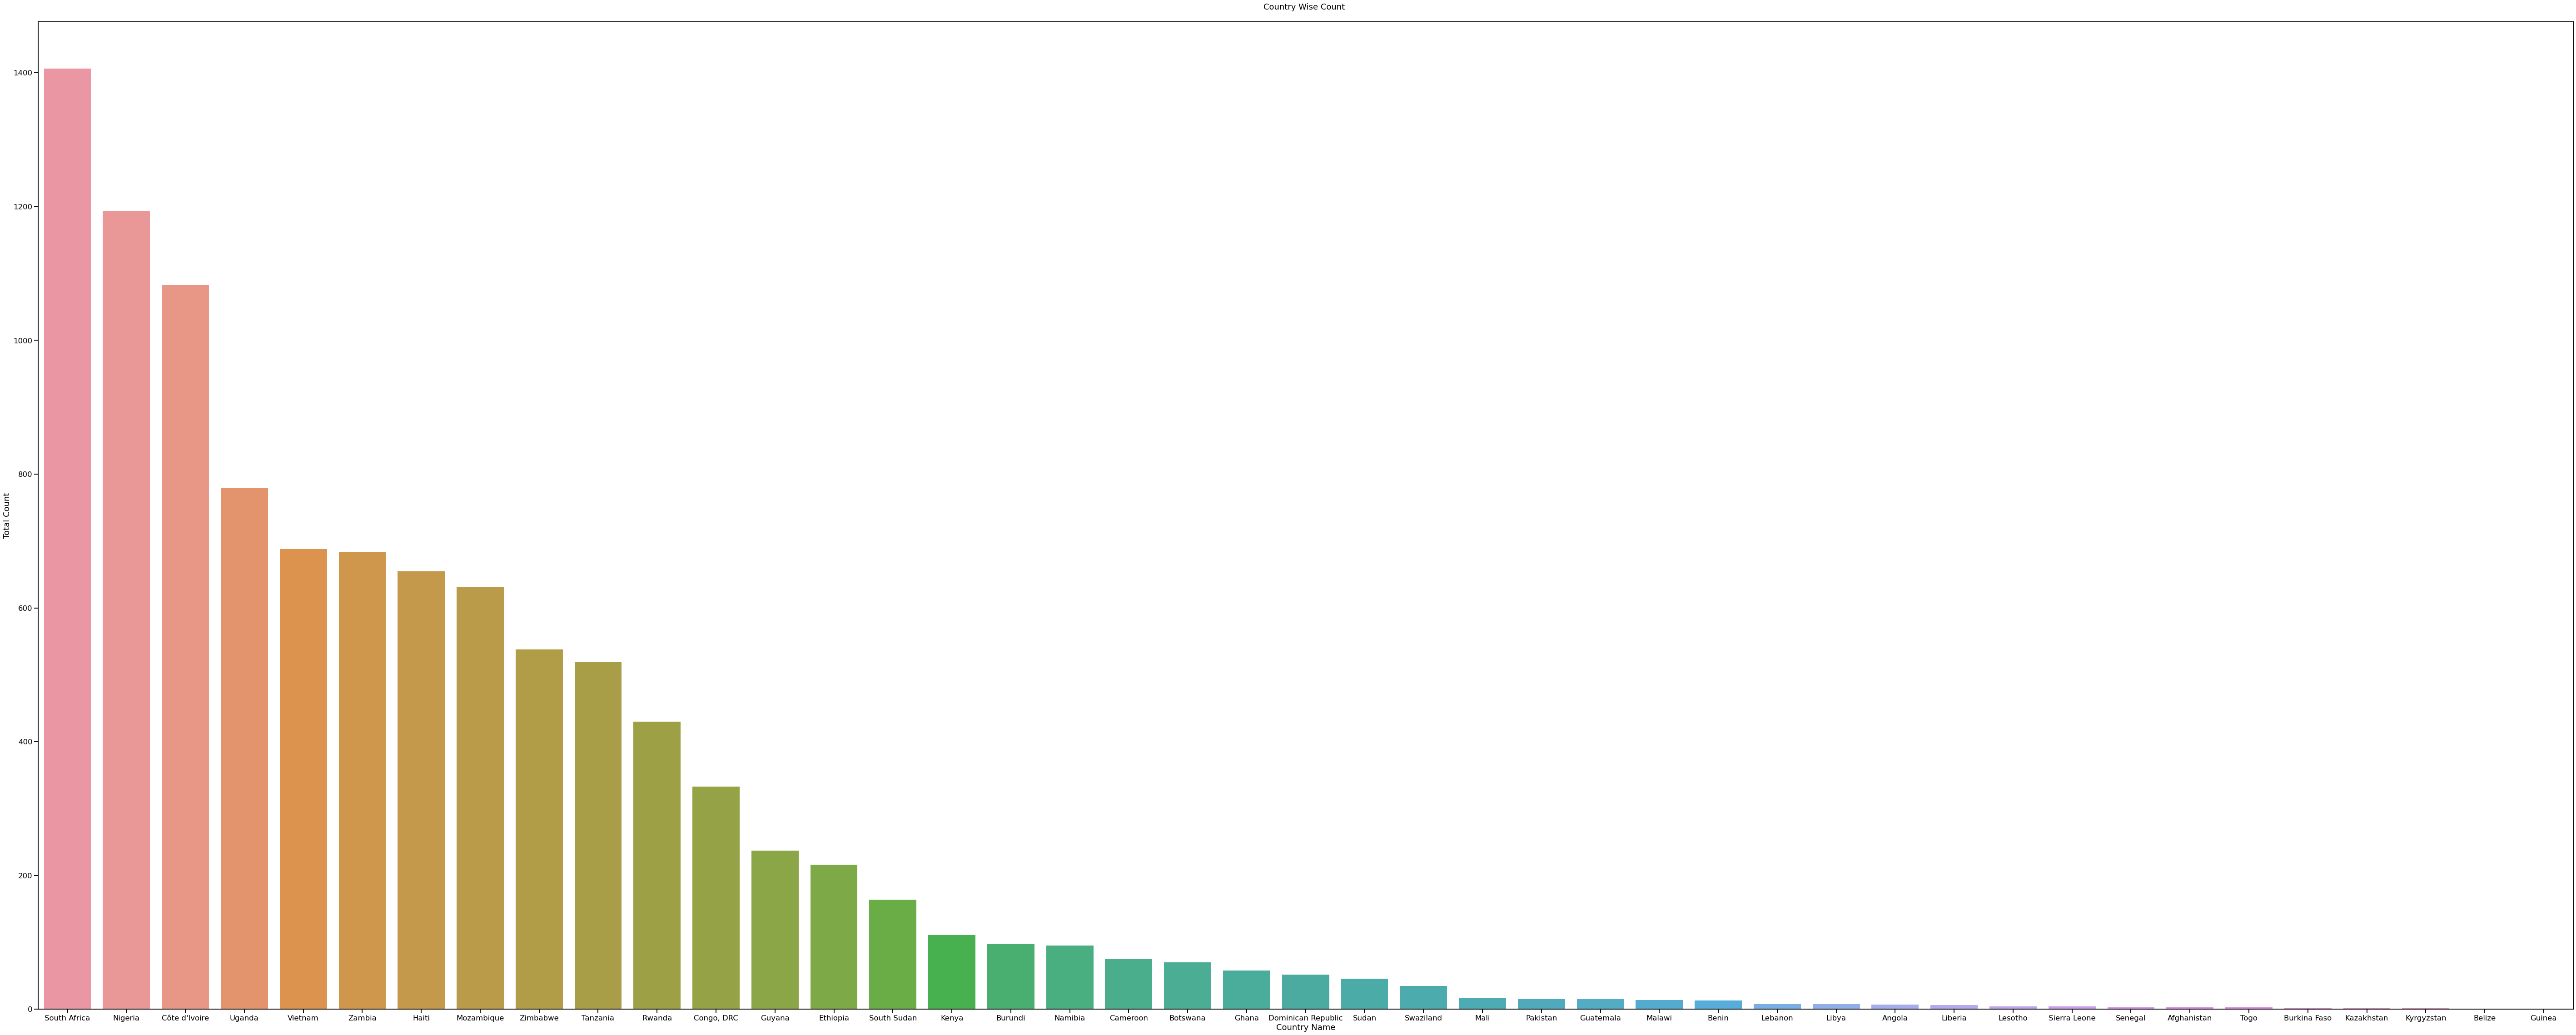

In [63]:
#Exploratory Analysis
#Country wise count with graph
ItemCount = df["country"].value_counts().nlargest(50)
print("Country Wise Count \n")
print(ItemCount) 
sn.set_context("talk", font_scale = 1)
plt.figure(figsize=(100, 40))
sn.countplot(df["country"],order = df["country"].value_counts().nlargest(50).index)
plt.title('Country Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')


manufacturing site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
dtype: int64


Text(0.5, 0, 'Manufacturing Location')

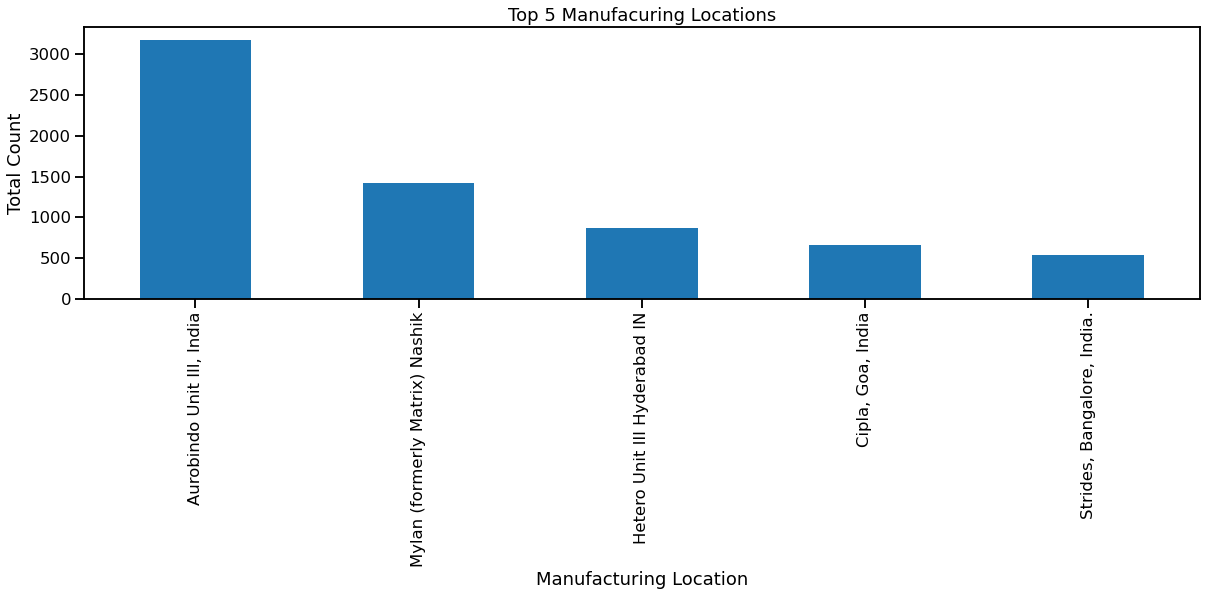

In [64]:
#Top 5 manufacturing sites for all shipment modes
plt.figure(figsize=(20,5))
Top5ManufacuringLocations = df.groupby('manufacturing site').size().nlargest(5)
print(Top5ManufacuringLocations)
Top5ManufacuringLocations.plot(kind='bar')
plt.title('Top 5 Manufacuring Locations')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Location')

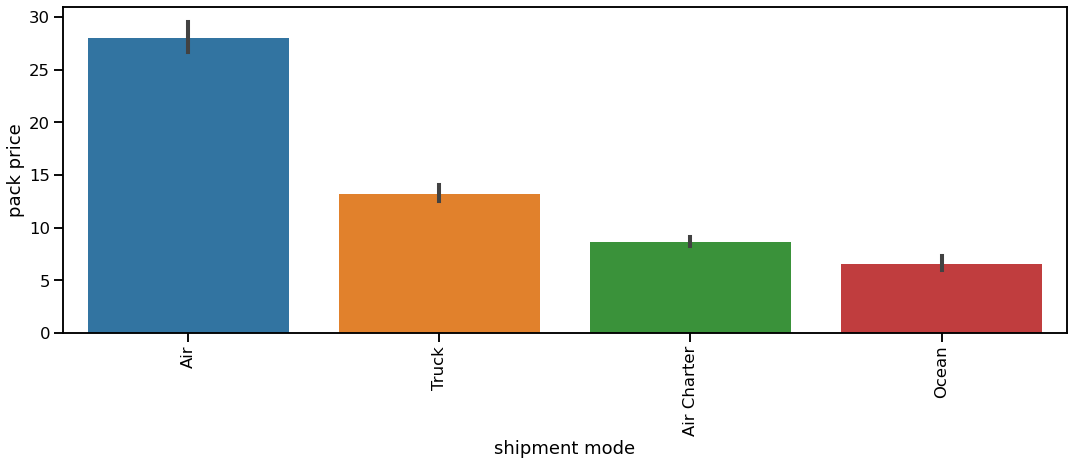

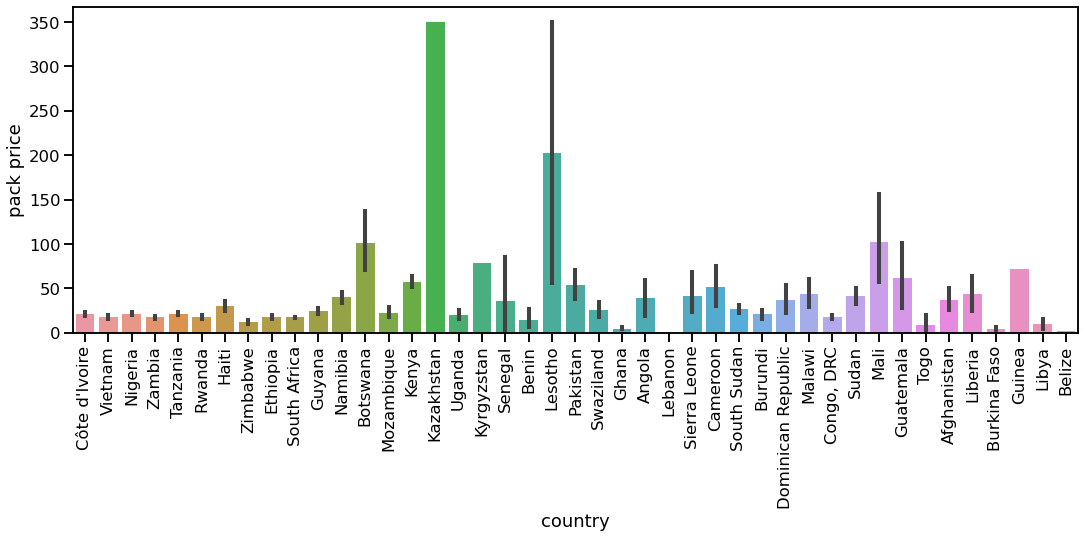

In [78]:
#Percentage Split of shipment mode
ShippingMode = df["shipment mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="shipment mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="shipment mode")

#Shipment mode and price pack realtionship
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('shipment mode','pack price', data = df)
plt.show()

#Country and price pack 
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('country','pack price', data = df)
plt.show()

In [66]:
#Selecting target variable
pack_price = df[["pack price"]]
pack_price.head()


,pack price
scheduled delivery date,
2006-06-02,29.00
2006-11-14,6.20
2006-08-27,80.00
2006-09-01,3.99
2006-08-11,3.20


In [67]:
pack_price.tail()

,pack price
scheduled delivery date,
2015-07-31,3.60
2015-07-31,6.52
2015-08-31,9.99
2015-09-09,6.52
2015-08-31,1.99


In [68]:
#dropping missing values
pack_price = pack_price.dropna()

In [69]:
pack_price.shape

(10324, 1)

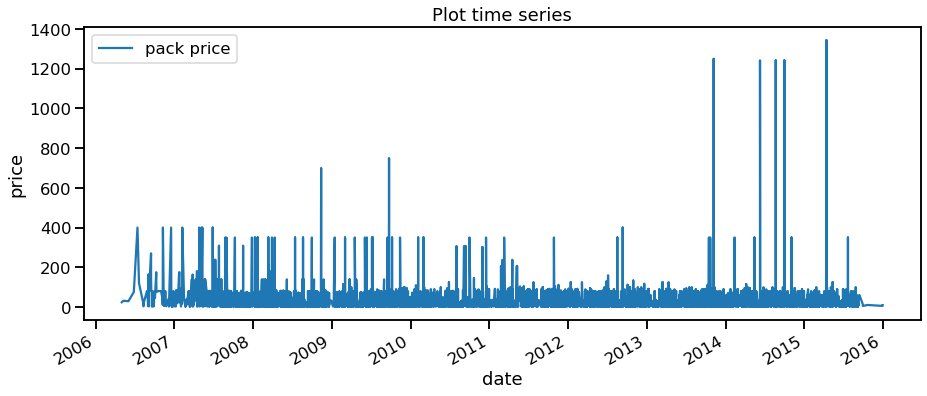

In [70]:
#Visualizing Time Series
pack_price.plot(figsize = (15, 6))
plt.title('Plot time series')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

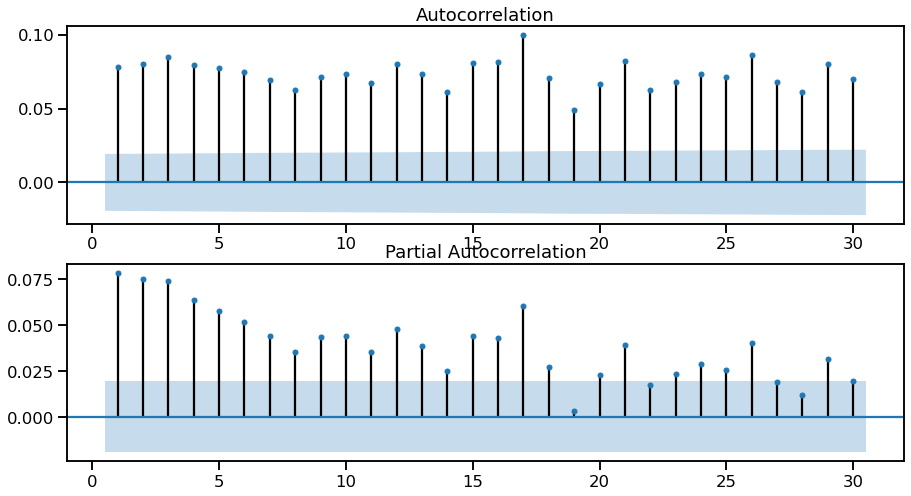

In [71]:
#Plot ACF and PACF
plt.rcParams["figure.figsize"] = 15, 8
pyplot.figure()
pyplot.subplot(211)
plot_acf(pack_price, ax=pyplot.gca(),lags=30,zero=False)
pyplot.subplot(212)
plot_pacf(pack_price, ax=pyplot.gca(),lags=30,zero=False)
pyplot.show()

In [72]:
#Splitting series
#Train and Test Split of closing prices
#90% training set and 10% Test Set
print(pack_price.shape)
train = pack_price.iloc[:-1032]
test = pack_price.iloc[-1032:]
print(train.shape,test.shape)


(10324, 1)
(9292, 1) (1032, 1)


In [73]:
train.head

<bound method NDFrame.head of                                   pack price
scheduled delivery date                     
2006-06-02                             29.00
2006-11-14                              6.20
2006-08-27                             80.00
2006-09-01                              3.99
2006-08-11                              3.20
...                                      ...
2014-10-08                             11.89
2014-11-28                              2.15
2015-01-30                              2.21
2015-01-31                              0.00
2014-10-31                             13.52

[9292 rows x 1 columns]>

In [77]:
test.head

<bound method NDFrame.head of                                   pack price
scheduled delivery date                     
2015-01-30                              7.72
2015-01-30                             13.49
2015-01-30                              6.60
2015-01-30                              7.72
2015-02-16                             13.49
...                                      ...
2015-07-31                              3.60
2015-07-31                              6.52
2015-08-31                              9.99
2015-09-09                              6.52
2015-08-31                              1.99

[1032 rows x 1 columns]>